In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import magnetopy as mp

The `QDFile` class is the starting point for working with .dat files in `magnetopy`. In VS Code, hover your cursor over the "QDFile" text below to see the docstring for this class, or click on the text (such that the cursor is blinking somewhere inside "QDFile") and press F12 to open the source code for this class.

In [2]:
mvsh_file = Path("101022_00006.dat")
mvsh = mp.QDFile(mvsh_file)

The `parsed_data` attribute of the `QDFile` object contains a `pandas` DataFrame with the magnetic data. 

In [3]:
parsed: pd.DataFrame = mvsh.parsed_data
parsed.head()

,Time Stamp (sec),Temperature (K),Magnetic Field (Oe),Center Position (mm),Range,Min. Temperature (K),Max. Temperature (K),Min. Field (Oe),Max. Field (Oe),Average Temp (K),...,DC Moment Err Fixed Ctr (emu),DC Moment Free Ctr (emu),DC Moment Err Free Ctr (emu),DC Fixed Fit,DC Free Fit,DC Calculated Center (mm),DC Calculated Center Err (mm),DC Squid Drift,Raw Scans,Moment_per_mass
0,3.874608e+09,293.220718,-70000.039062,34.24989,10.0,293.219696,293.227997,-70000.039062,-70000.039062,293.224720,...,0.000057,-0.000854,0.000057,0.314999,0.335316,34.985477,0.000000,-0.010281,Scan 0,-0.618938
1,3.874608e+09,293.201141,-65000.289062,34.24989,10.0,293.197632,293.211029,-65000.289062,-65000.289062,293.206216,...,0.000057,-0.000884,0.000057,0.353765,0.373583,34.935303,inf,0.016924,Scan 1,-0.640890
2,3.874608e+09,293.169449,-60000.429688,34.24989,10.0,293.159729,293.181183,-60000.429688,-60000.429688,293.174847,...,0.000056,-0.000911,0.000056,0.394360,0.413481,34.884434,0.031861,0.024248,Scan 2,-0.660253
3,3.874608e+09,293.225235,-55000.351562,34.24989,10.0,293.209656,293.240936,-55000.351562,-55000.351562,293.231958,...,0.000055,-0.000933,0.000055,0.439923,0.457936,34.826450,0.000000,0.025472,Scan 3,-0.676415
4,3.874608e+09,293.303177,-50000.304688,34.24989,10.0,293.283112,293.322815,-50000.304688,-50000.304688,293.310901,...,0.000055,-0.000958,0.000055,0.486043,0.503549,34.782513,0.000000,0.027353,Scan 4,-0.694479


When creating a `QDFile` object for a .dat file, `magnetopy` will automatically look for a corresponding .rw.dat file. If it exists, then the `parsed_data` attribute will contain an additional column "Raw Scans." Elements of this column are `magnetopy` `SingleRawDCScan` objects. Again, hovering over "SingleRawDCScan" or clicking and pressing F12 will show the docstring or source code for this class.

Note: there's a typo in the docstring right now -- `fit_scan` should be `QD_fit_scan`

The attributes of initial interest will probably be `up_scan`, `down_scan`, and `QD_fit_scan`, which are all `DataFrame` objects containing voltage scans from the raw file. The main benefit of working with `magnetopy` for raw data is the `parsed_data` attribute of the `QDFile`, as each data point in the .dat file is associated with its correct raw scan in the .rw.dat file.

In [4]:
first_raw_scan: mp.SingleRawDCScan = parsed["Raw Scans"][0]
first_raw_scan.up_scan.head()

,Time Stamp (sec),Raw Position (mm),Raw Voltage (V),Processed Voltage (V)
0,3.874608e+09,16.825001,0.016565,0.056910
1,3.874608e+09,16.997425,0.004118,0.044665
2,3.874608e+09,17.171970,-0.006845,0.033907
3,3.874608e+09,17.346062,-0.016547,0.024409
4,3.874608e+09,17.520151,-0.026962,0.014199


Here's how you could plot the data for a single scan:

Text(0, 0.5, 'Free C Fitted (V)')

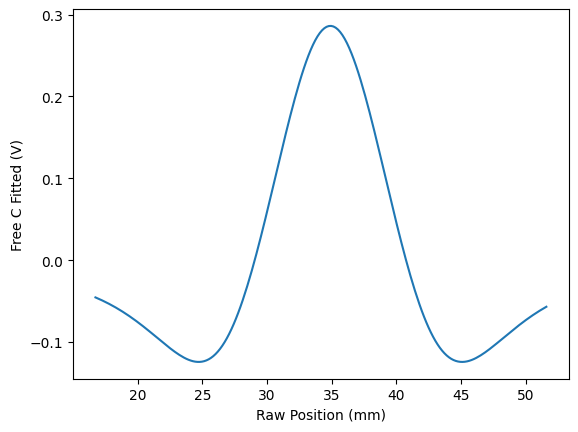

In [5]:
fig, ax = plt.subplots()
x = first_raw_scan.QD_fit_scan["Raw Position (mm)"]
y = first_raw_scan.QD_fit_scan["Free C Fitted (V)"]
ax.plot(x, y)
ax.set_xlabel("Raw Position (mm)")
ax.set_ylabel("Free C Fitted (V)")

The `plot` module of `magnetopy` has a function which does this for you. Note that at the moment it will only plot the `QD_fit_scan`

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Position (mm)', ylabel='Free C Fitted (V)'>)

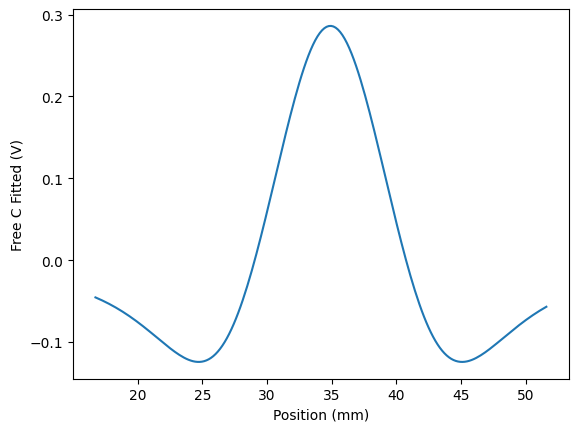

In [6]:
mp.plot_voltage_scan(first_raw_scan)

The example data is an M vs H curve. Let's isolate the forward sweep.

In [7]:
max_field_index = parsed["Magnetic Field (Oe)"].idxmax()
forward_sweep = parsed.iloc[:max_field_index]
reverse_sweep = parsed.iloc[max_field_index:]

In [8]:
forward_sweep.head()

,Time Stamp (sec),Temperature (K),Magnetic Field (Oe),Center Position (mm),Range,Min. Temperature (K),Max. Temperature (K),Min. Field (Oe),Max. Field (Oe),Average Temp (K),...,DC Moment Err Fixed Ctr (emu),DC Moment Free Ctr (emu),DC Moment Err Free Ctr (emu),DC Fixed Fit,DC Free Fit,DC Calculated Center (mm),DC Calculated Center Err (mm),DC Squid Drift,Raw Scans,Moment_per_mass
0,3.874608e+09,293.220718,-70000.039062,34.24989,10.0,293.219696,293.227997,-70000.039062,-70000.039062,293.224720,...,0.000057,-0.000854,0.000057,0.314999,0.335316,34.985477,0.000000,-0.010281,Scan 0,-0.618938
1,3.874608e+09,293.201141,-65000.289062,34.24989,10.0,293.197632,293.211029,-65000.289062,-65000.289062,293.206216,...,0.000057,-0.000884,0.000057,0.353765,0.373583,34.935303,inf,0.016924,Scan 1,-0.640890
2,3.874608e+09,293.169449,-60000.429688,34.24989,10.0,293.159729,293.181183,-60000.429688,-60000.429688,293.174847,...,0.000056,-0.000911,0.000056,0.394360,0.413481,34.884434,0.031861,0.024248,Scan 2,-0.660253
3,3.874608e+09,293.225235,-55000.351562,34.24989,10.0,293.209656,293.240936,-55000.351562,-55000.351562,293.231958,...,0.000055,-0.000933,0.000055,0.439923,0.457936,34.826450,0.000000,0.025472,Scan 3,-0.676415
4,3.874608e+09,293.303177,-50000.304688,34.24989,10.0,293.283112,293.322815,-50000.304688,-50000.304688,293.310901,...,0.000055,-0.000958,0.000055,0.486043,0.503549,34.782513,0.000000,0.027353,Scan 4,-0.694479


In [9]:
reverse_sweep.head()

,Time Stamp (sec),Temperature (K),Magnetic Field (Oe),Center Position (mm),Range,Min. Temperature (K),Max. Temperature (K),Min. Field (Oe),Max. Field (Oe),Average Temp (K),...,DC Moment Err Fixed Ctr (emu),DC Moment Free Ctr (emu),DC Moment Err Free Ctr (emu),DC Fixed Fit,DC Free Fit,DC Calculated Center (mm),DC Calculated Center Err (mm),DC Squid Drift,Raw Scans,Moment_per_mass
114,3.874611e+09,293.224106,70000.289062,34.244732,10.0,293.203918,293.242828,70000.289062,70000.289062,293.228381,...,0.000057,0.000858,0.000057,0.322487,0.342548,34.966328,0.000000,0.012857,Scan 114,0.621721
115,3.874611e+09,293.228424,65000.320312,34.244732,10.0,293.223206,293.236572,65000.320312,65000.320312,293.232291,...,0.000057,0.000885,0.000057,0.353959,0.373895,34.931873,0.000000,-0.011675,Scan 115,0.641303
116,3.874611e+09,293.264923,60000.285156,34.244732,10.0,293.252411,293.280396,60000.285156,60000.285156,293.271896,...,0.000056,0.000910,0.000056,0.395829,0.415040,34.878765,0.000000,-0.018494,Scan 116,0.659563
117,3.874611e+09,293.212524,55000.269531,34.244732,10.0,293.203583,293.221893,55000.269531,55000.269531,293.214532,...,0.000055,0.000935,0.000056,0.439504,0.457948,34.828522,4.331794,-0.023841,Scan 117,0.677627
118,3.874611e+09,293.171402,50000.390625,34.244732,10.0,293.159241,293.183228,50000.390625,50000.390625,293.174811,...,0.000055,0.000959,0.000055,0.483921,0.501467,34.780045,0.000000,-0.027682,Scan 118,0.694612


Now let's look at the raw scans for the forward sweep. `magnetopy` has a function (found in `plot_helpers`) called `linear_color_gradient()` which is pretty useful for plotting stuff like this.

In [10]:
def plot_raw_scans(data: pd.DataFrame, selected_scan: str = "fit"):
    """ 
    Plot the raw scans in a dataframe.

    Parameters
    ----------
    data : pd.DataFrame
        The dataframe containing the raw scans. Must contain a column named
        "Raw Scans" containing SingleRawDCScan objects.
    selected_scan : str, optional
        Either "fit", "up", or "down". Determines which scan to plot. Defaults
        to "fit".
    """
    colors = mp.linear_color_gradient("purple", "green", len(data))
    fig, ax = plt.subplots()
    scans: pd.Series[mp.SingleRawDCScan] = data["Raw Scans"]
    for i, scan_obj in enumerate(scans):
        scan = {
            "fit": scan_obj.QD_fit_scan,
            "up": scan_obj.up_scan,
            "down": scan_obj.down_scan
        }[selected_scan]
        x = scan["Raw Position (mm)"]
        y = scan["Free C Fitted (V)"]
        ax.plot(x, y, color=colors[i])
    ax.set_xlabel("Raw Position (mm)")
    ax.set_ylabel("Free C Fitted (V)")
    return fig, ax

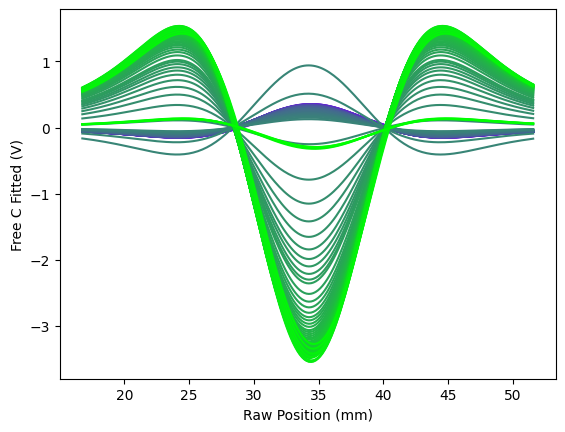

In [11]:
fig, ax = plot_raw_scans(forward_sweep)
plt.show()